# Performance comparison for all trained models

Tomasz Szoldra, 2023

In [1]:
import sys
import os
from functools import partial

import tensorflow as tf
from matplotlib import pyplot as plt
import matplotlib as mpl
import numpy as np
import glob

from attoDNN.attodataset import AttoDataset
import attoDNN.data_generator as dg
import attoDNN.train_utils as tu
import attoDNN.preprocess as pp
import attoDNN.evaluation_utils as eu

from mpl_toolkits.axes_grid1.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)
import pickle
import pandas as pd
from pandas.io.formats.style import Styler
import copy

In [3]:
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "-1" 

In [64]:
# path to python pickle produced by 


# python run/evaluate.py list_of_all_evaluation_datasets.txt models/*.h5 analysis_all_models.pkl --gpu

# on all models with true/predicted values of the ponderomotive potential

analysis_path = '../../public_dataset/analysis_all_models.pkl'

In [14]:
with open(analysis_path, 'rb') as f:
    grid, unique_model_names, unique_train_dataset_names, unique_eval_dataset_names = pickle.load(f)

In [15]:
unique_model_names

['BayesianEfficientNetV2L',
 'BayesianEfficientNetB7',
 'BayesianVGG16',
 'BayesianXception']

In [22]:
# extended names of the training datasets
unique_train_dataset_names

['QProp_Ar_4590_LongPulse_CEP2_10000_full_FA_tight_no_time_avg_joined_CEP_avg.npz_SL_-1.0',
 'QProp_Ar_4590_LongPulse_CEP2_10000_full_FA_tight_no_time_avg_joined_CEP_avg.npz_SL_1.0',
 'QProp_Ar_4590_LongPulse_CEP2_10000_full_CEP_avg_joined.npz_SL_-1.0',
 'QProp_Ar_4590_LongPulse_CEP2_10000_full_joined.npz_SL_0.5',
 'QProp_Ar_4590_LongPulse_CEP2_10000_full_FA_tight_no_time_avg_joined_CEP_avg.npz_SL_-0.5',
 'QProp_Ar_4590_LongPulse_CEP2_10000_full_FA_tight_no_time_avg_joined_CEP_avg.npz_SL_0.0',
 'QProp_Ar_4590_LongPulse_CEP2_10000_full_FA_tight_no_time_avg_joined_CEP_avg.npz_SL_0.5',
 'QProp_Ar_4590_LongPulse_CEP2_10000_full_CEP_avg_joined.npz_SL_1.0',
 'QProp_Ar_4590_LongPulse_CEP2_10000_full_CEP_avg_joined.npz_SL_0.0',
 'QProp_Ar_4590_LongPulse_CEP2_10000_full_joined.npz_SL_-0.5',
 'QProp_Ar_4590_LongPulse_CEP2_10000_full_CEP_avg_joined.npz_SL_0.5',
 'QProp_Ar_4590_LongPulse_CEP2_10000_full_FA_tight_no_time_avg_joined.npz_SL_-1.0',
 'QProp_Ar_4590_LongPulse_CEP2_10000_full_CEP_avg_joi

In [23]:
# extended names of the datasets we evaluated the models on
unique_eval_dataset_names

['QProp_Ar_4590_LongPulse_CEP2_10000_full_FA_tight_no_time_avg_joined_CEP_avg.npz',
 'QProp_Ar_4590_LongPulse_CEP2_10000_full_FA_tight_no_time_avg_joined_CEP_avg.npz_train',
 'QProp_Ar_4590_LongPulse_CEP2_10000_full_FA_tight_no_time_avg_joined.npz',
 'QProp_Ar_4590_LongPulse_CEP2_10000_full_joined.npz',
 'QProp_Ar_4590_LongPulse_CEP2_10000_full_CEP_avg_joined.npz',
 'SFA_1k.npz',
 'SFA_1k_CEP_avg.npz',
 'SFA_1k_FA_tight_no_time_avg.npz',
 'SFA_1k_FA_tight_no_time_avg_CEP_avg.npz',
 'Experiment_Argon_Intensity_Sweep_01_cutoff.npz',
 'Experiment_Argon_Intensity_Sweep_02_cutoff.npz',
 'Experiment_Argon_Intensity_Sweep_03_cutoff.npz',
 'Experiment_Argon_Intensity_Sweep_04_cutoff.npz',
 'Experiment_Argon_Single_Intensity_01_cutoff.npz',
 'Experiment_Argon_Intensity_Sweep_01_abs.npz',
 'Experiment_Argon_Intensity_Sweep_02_abs.npz',
 'Experiment_Argon_Intensity_Sweep_03_abs.npz',
 'Experiment_Argon_Intensity_Sweep_04_abs.npz',
 'Experiment_Argon_Single_Intensity_01_abs.npz',
 'QProp_Ar_4590_L

``grid`` is a multilevel dictionary of the format: ``grid['training_dataset']['model']['evaluation_dataset']['model_number']``, and contains $y_{true}$, $y_{pred}$, $\sigma^2$, and metrics MAE, MAPE, MSE, RMSE; for example:

In [81]:
training_dataset = 'QProp_Ar_4590_LongPulse_CEP2_10000_full_CEP_avg_joined.npz_SL_-0.5'
model = 'BayesianVGG16'
evaluation_dataset = 'QProp_Ar_4590_LongPulse_CEP2_10000_full_FA_tight_no_time_avg_joined_CEP_avg.npz'
model_number = 1002 # in the ensemble, if there are 5 models they have numbers 1000-1004


grid[training_dataset][model][evaluation_dataset][model_number]

{'sigmasq_pred': array([[0.00014785],
        [0.00011316],
        [0.00012219],
        ...,
        [0.00028707],
        [0.00029091],
        [0.00028575]], dtype=float32),
 'y_true': array([[0.0075],
        [0.0075],
        [0.0075],
        ...,
        [0.95  ],
        [0.95  ],
        [0.95  ]]),
 'y_pred': array([[0.00673701],
        [0.00642419],
        [0.00630583],
        ...,
        [0.45347226],
        [0.44954306],
        [0.46021032]], dtype=float32),
 'MAE': 0.17591475162308676,
 'MAPE': 53.03997510739305,
 'MSE': 0.050352927204635724,
 'RMSE': 0.22439457926749418}

In [40]:
# we will use function below to parse the long dataset names that emerged in the development phase to the format that appears in the paper

def parse_dataset_name(dsbasename):
    d = {'QProp_Ar_4590_LongPulse_CEP2_10000_full_FA_tight_no_time_avg_joined_CEP_avg.npz_SL_-1.0': 'QProp+FA+CA -1.0',
 'QProp_Ar_4590_LongPulse_CEP2_10000_full_FA_tight_no_time_avg_joined_CEP_avg.npz_SL_1.0': 'QProp+FA+CA 1.0',
 'QProp_Ar_4590_LongPulse_CEP2_10000_full_CEP_avg_joined.npz_SL_-1.0': 'QProp+CA -1.0',
 'QProp_Ar_4590_LongPulse_CEP2_10000_full_joined.npz_SL_0.5': 'QProp 0.5',
 'QProp_Ar_4590_LongPulse_CEP2_10000_full_FA_tight_no_time_avg_joined_CEP_avg.npz_SL_-0.5': 'QProp+FA+CA -0.5',
 'QProp_Ar_4590_LongPulse_CEP2_10000_full_FA_tight_no_time_avg_joined_CEP_avg.npz_SL_0.0': 'QProp+FA+CA 0.0',
 'QProp_Ar_4590_LongPulse_CEP2_10000_full_FA_tight_no_time_avg_joined_CEP_avg.npz_SL_0.5': 'QProp+FA+CA 0.5',
 'QProp_Ar_4590_LongPulse_CEP2_10000_full_CEP_avg_joined.npz_SL_1.0': 'QProp+CA 1.0',
 'QProp_Ar_4590_LongPulse_CEP2_10000_full_CEP_avg_joined.npz_SL_0.0': 'QProp+CA 0.0',
 'QProp_Ar_4590_LongPulse_CEP2_10000_full_joined.npz_SL_-0.5': 'QProp -0.5',
 'QProp_Ar_4590_LongPulse_CEP2_10000_full_CEP_avg_joined.npz_SL_0.5': 'QProp+CA 0.5',
 'QProp_Ar_4590_LongPulse_CEP2_10000_full_FA_tight_no_time_avg_joined.npz_SL_-1.0': 'QProp+FA -1.0',
 'QProp_Ar_4590_LongPulse_CEP2_10000_full_CEP_avg_joined.npz_SL_-0.5': 'QProp+CA -0.5',
 'QProp_Ar_4590_LongPulse_CEP2_10000_full_joined.npz_SL_-1.0': 'QProp -1.0',
 'QProp_Ar_4590_LongPulse_CEP2_10000_full_FA_tight_no_time_avg_joined.npz_SL_-0.5': 'QProp+FA -0.5',
 'QProp_Ar_4590_LongPulse_CEP2_10000_full_FA_tight_no_time_avg_joined.npz_SL_0.0': 'QProp+FA 0.0',
 'QProp_Ar_4590_LongPulse_CEP2_10000_full_joined.npz_SL_0.0': 'QProp 0.0',
 'QProp_Ar_4590_LongPulse_CEP2_10000_full_FA_tight_no_time_avg_joined.npz_SL_1.0': 'QProp+FA 1.0',
 'QProp_Ar_4590_LongPulse_CEP2_10000_full_joined.npz_SL_1.0': 'QProp 1.0',
 'QProp_Ar_4590_LongPulse_CEP2_10000_full_FA_tight_no_time_avg_joined.npz_SL_0.5': 'QProp+FA 0.5',
         'QProp_Ar_4590_LongPulse_CEP2_10000_full_FA_tight_no_time_avg_joined_CEP_avg.npz': 'QProp+FA+CA (test)',
 'QProp_Ar_4590_LongPulse_CEP2_10000_full_FA_tight_no_time_avg_joined_CEP_avg.npz_train': 'QProp+FA+CA (train)',
 'QProp_Ar_4590_LongPulse_CEP2_10000_full_FA_tight_no_time_avg_joined.npz': 'QProp+FA (test)',
 'QProp_Ar_4590_LongPulse_CEP2_10000_full_joined.npz': 'QProp (test)',
 'QProp_Ar_4590_LongPulse_CEP2_10000_full_CEP_avg_joined.npz': 'QProp+CA (test)',
 'SFA_1k.npz': "SFA",
 'SFA_1k_CEP_avg.npz': "SFA+CA",
 'SFA_1k_FA_tight_no_time_avg.npz': 'SFA+FA',
 'SFA_1k_FA_tight_no_time_avg_CEP_avg.npz': 'SFA+FA+CA',
 'Experiment_Argon_Intensity_Sweep_01_cutoff.npz': 'E1',
 'Experiment_Argon_Intensity_Sweep_02_cutoff.npz': 'E2',
 'Experiment_Argon_Intensity_Sweep_03_cutoff.npz': 'E3',
 'Experiment_Argon_Intensity_Sweep_04_cutoff.npz': 'E4',
 'Experiment_Argon_Single_Intensity_01_cutoff.npz': 'E (single)',
 'Experiment_Argon_Intensity_Sweep_01_abs.npz': 'E1 (abs)', # datasets where the absolute value of negative PMD artifacts appearing in experiments was taken;
 'Experiment_Argon_Intensity_Sweep_02_abs.npz': 'E2 (abs)', # not included in the main paper
 'Experiment_Argon_Intensity_Sweep_03_abs.npz': 'E3 (abs)',
 'Experiment_Argon_Intensity_Sweep_04_abs.npz': 'E4 (abs)',
 'Experiment_Argon_Single_Intensity_01_abs.npz': 'E (single) (abs)',
 'QProp_Ar_4590_LongPulse_CEP2_10000_full_CEP_avg_joined.npz_train': 'QProp+CA (train)',
 'QProp_Ar_4590_LongPulse_CEP2_10000_full_joined.npz_train': 'QProp (train)',
 'QProp_Ar_4590_LongPulse_CEP2_10000_full_FA_tight_no_time_avg_joined.npz_train': 'QProp+FA (train)',
 'Experiment_Argon_High_Statistics_Intensity_Sweep_01.npz': 'E HS'
           }
    if dsbasename in list(d.keys()):
        return d[dsbasename]
    else: 
        return dsbasename

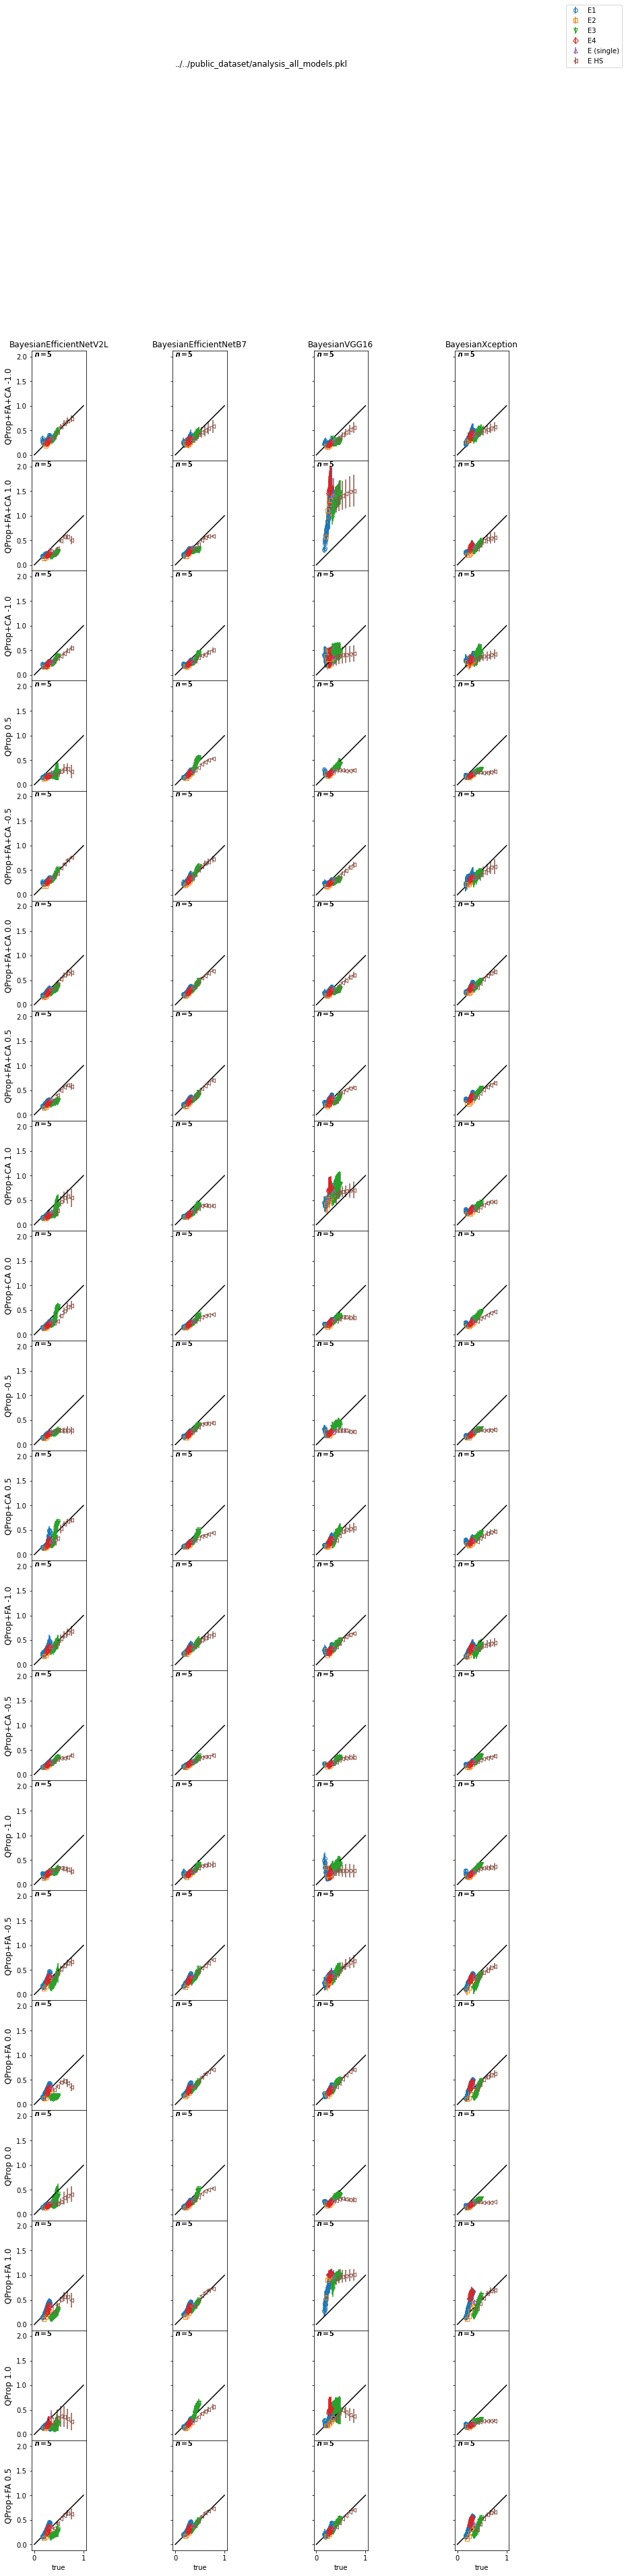

In [66]:
# true vs predicted value of the ponderomotive potential Up for different models (column) and different training datasets (rows)
# n=5 in the corner shows the number of independently trained models in the ensemble
fig, axs = eu.plot_evaluation_grid(grid, 
                                   unique_model_names,
                                   unique_train_dataset_names,  
                                   eval_dataset_names=[x for x in unique_eval_dataset_names 
                                                       if 'Experiment' in x and ('cutoff' in x or "High" in x)], # comment to show all data
                                   subplot_kwargs={'sharex': True, 'sharey': True, 'figsize': (15, 60)},
                                   color_list=None,
                                   marker_list=None,
                                   plot_single_model_number=None, 
                                   max_points_per_dataset=1000,
                                   suptitle=analysis_path,
                                   parse_dataset_name_fun=parse_dataset_name)
plt.show()

# Plots for the paper - FIG 3

In [67]:
eval_datasets = [ 'QProp_Ar_4590_LongPulse_CEP2_10000_full_FA_tight_no_time_avg_joined_CEP_avg.npz',
                 'SFA_1k_FA_tight_no_time_avg_CEP_avg.npz',
                 'Experiment_Argon_Intensity_Sweep_01_cutoff.npz',
                 'Experiment_Argon_Intensity_Sweep_02_cutoff.npz',
                 'Experiment_Argon_Intensity_Sweep_03_cutoff.npz',
                 'Experiment_Argon_Intensity_Sweep_04_cutoff.npz',
                 'Experiment_Argon_Single_Intensity_01_cutoff.npz',
                 'Experiment_Argon_High_Statistics_Intensity_Sweep_01.npz']

In [68]:
marker_list = ['o', 's', 'v', 'D', '^', '<', '>']

In [73]:
def is_exp(dsbasename):
    return 'Experiment' in dsbasename

In [69]:
# custom plotting style with latex
mpl.rcParams.update(mpl.rcParamsDefault)

mpl.rcParams.update({'xtick.direction': 'in',
                     'ytick.direction': 'in'})

plt.rcParams.update({
    "text.usetex": True, #needs apt-get install cm-super
    "font.family": 'STIXGeneral',#"sans-serif",
    "font.sans-serif": ["Helvetica"],
    "font.size": 20, 
    'text.latex.preamble': r'\usepackage{amsfonts}\usepackage{physics}' # for \mathbb
})
colors = list(mpl.colors.TABLEAU_COLORS.keys())

In [70]:
colors

['tab:blue',
 'tab:orange',
 'tab:green',
 'tab:red',
 'tab:purple',
 'tab:brown',
 'tab:pink',
 'tab:gray',
 'tab:olive',
 'tab:cyan']

In [76]:
colors = [
 'tab:blue',
 'tab:gray',
 'tab:cyan',
 'tab:orange',
 'tab:pink',
 'tab:green',
 'tab:olive',
 'tab:cyan',
 'tab:red',
 ]

In [71]:
def Up_to_I_TWcm2(Up, omega=0.057):
    I = 4 * omega**2 / 0.0000285 * Up
    return I

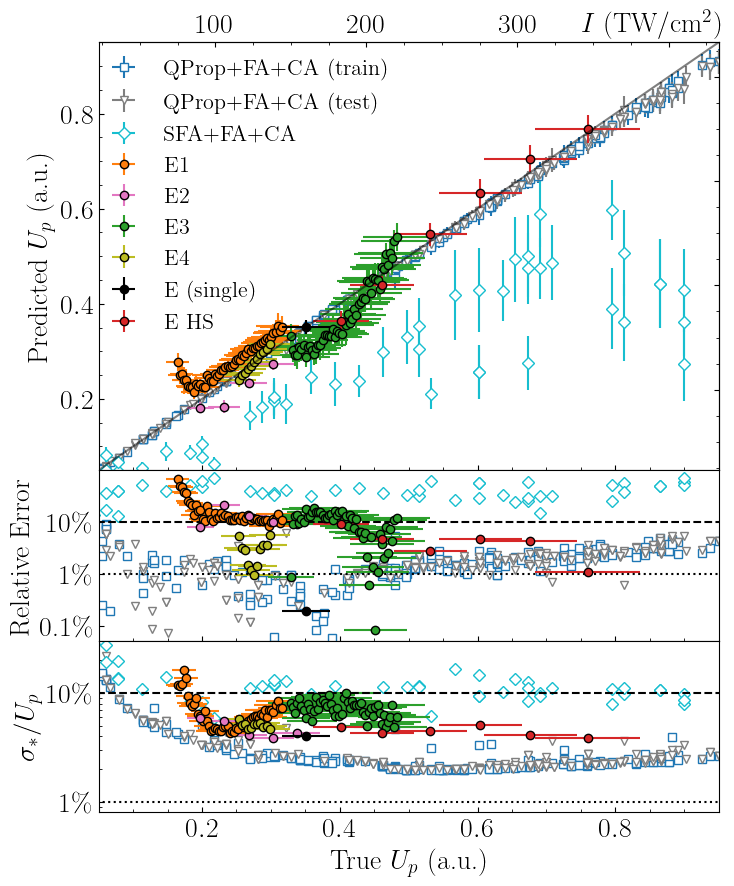

In [82]:
nrows = 3
ncols = 1


experiment_relative_error = 0.1
max_plotpoints = 50
max_plotpoints_condition = lambda dataset_name: 'SFA' in dataset_name #or 'Experiment' in dataset_name or 'QProp' in dataset_name

max_plotpoints2 = 200
max_plotpoints2_condition = lambda dataset_name: 'QProp' in dataset_name

np.random.seed(3)


model = ['Bayesian'+n for n in ['EfficientNetV2L', 'Xception', 'VGG16', 'EfficientNetB7']][0]
train_datasets = ['QProp_Ar_4590_LongPulse_CEP2_10000_full_FA_tight_no_time_avg_joined_CEP_avg.npz_SL_-0.5',
                  #'QProp_Ar_4590_LongPulse_CEP2_10000_full_FA_tight_no_time_avg_joined_CEP_avg.npz_SL_0.0',
                  #'QProp_Ar_4590_LongPulse_CEP2_10000_full_FA_tight_no_time_avg_joined_CEP_avg.npz_SL_-0.5'
                  #'QProp_Ar_4590_LongPulse_CEP2_10000_full_FA_tight_no_time_avg_joined_CEP_avg.npz_SL_0.5',
                  #'QProp_Ar_4590_LongPulse_CEP2_10000_full_FA_tight_no_time_avg_joined_CEP_avg.npz_SL_0.0',
                  #'QProp_Ar_4590_LongPulse_CEP2_10000_full_FA_tight_no_time_avg_joined_CEP_avg.npz_SL_0.0'
                  #'QProp_Ar_4590_LongPulse_CEP2_10000_full_joined.npz_SL_-0.5',
                  #'QProp_Ar_4590_LongPulse_CEP2_10000_full_CEP_avg_joined.npz_SL_0.0',
                  #'QProp_Ar_4590_LongPulse_CEP2_10000_full_FA_tight_no_time_avg_joined.npz_SL_-0.5',
                  #'QProp_Ar_4590_LongPulse_CEP2_10000_full_FA_tight_no_time_avg_joined_CEP_avg.npz_SL_-1.0',
                  #'QProp_Ar_4590_LongPulse_CEP2_10000_full_joined.npz_SL_0.5',
                  #'QProp_Ar_4590_LongPulse_CEP2_10000_full_FA_tight_no_time_avg_joined.npz_SL_-1.0',
                  #'QProp_Ar_4590_LongPulse_CEP2_10000_full_FA_tight_no_time_avg_joined_CEP_avg.npz_SL_-1.0',
                  #'QProp_Ar_4590_LongPulse_CEP2_10000_full_FA_tight_no_time_avg_joined_CEP_avg.npz_SL_0.0',
                  #'QProp_Ar_4590_LongPulse_CEP2_10000_full_FA_tight_no_time_avg_joined_CEP_avg.npz_SL_-0.5',
                  #'QProp_Ar_4590_LongPulse_CEP2_10000_full_FA_tight_no_time_avg_joined_CEP_avg.npz_SL_1.0'
                  #'QProp_Ar_4590_LongPulse_CEP2_10000_full_FA_tight_no_time_avg_joined_CEP_avg.npz_maxSL_0.5_SL_-1.0',
                  #'QProp_Ar_4590_LongPulse_CEP2_10000_full_FA_tight_no_time_avg_joined_CEP_avg.npz_maxSL_0.5_SL_0.0',
                  #'QProp_Ar_4590_LongPulse_CEP2_10000_full_FA_tight_no_time_avg_joined_CEP_avg.npz_maxSL_0.5_SL_0.5',
                  #'QProp_Ar_4590_LongPulse_CEP2_10000_full_FA_tight_no_time_avg_joined.npz_SL_0.0',
                  #'QProp_Ar_4590_LongPulse_CEP2_10000_full_joined.npz_SL_-0.5',  
    
                  #'QProp_Ar_4590_LongPulse_CEP2_10000_full_FA_tight_no_time_avg_joined.npz_SL_-0.5',
                 
                  #'QProp_Ar_4590_LongPulse_CEP2_10000_full_CEP_avg_joined.npz_SL_-0.5',
                  #'QProp_Ar_4590_LongPulse_CEP2_10000_full_FA_tight_no_time_avg_joined_CEP_avg.npz_SL_0.5'
                    ]
eval_datasets = [#'QProp_Ar_LongPulse.npz',
 #'QProp_Ar_LongPulse_CEP2_FA_tight_no_time_avg.npz',
 #'QProp_Ar_4590_LongPulse_CEP2_10000_full_joined.npz',
 #'QProp_Ar_4590_LongPulse_CEP2_10000_full_FA_tight_no_time_avg_joined.npz',
 #'QProp_Ar_4590_LongPulse_CEP2_10000_full_CEP_avg_joined.npz',
 'QProp_Ar_4590_LongPulse_CEP2_10000_full_FA_tight_no_time_avg_joined_CEP_avg.npz_train',
 'QProp_Ar_4590_LongPulse_CEP2_10000_full_FA_tight_no_time_avg_joined_CEP_avg.npz',
    
 'SFA_1k_FA_tight_no_time_avg_CEP_avg.npz',
 
 'Experiment_Argon_Intensity_Sweep_01_cutoff.npz',
 'Experiment_Argon_Intensity_Sweep_02_cutoff.npz',
 'Experiment_Argon_Intensity_Sweep_03_cutoff.npz',
 'Experiment_Argon_Intensity_Sweep_04_cutoff.npz',
 'Experiment_Argon_Single_Intensity_01_cutoff.npz', 
 'Experiment_Argon_High_Statistics_Intensity_Sweep_01.npz']



eval_datasets_row1 = [eval_datasets, eval_datasets, eval_datasets]
eval_datasets_row2 =  [eval_datasets, eval_datasets, eval_datasets]
eval_datasets_row3 = [eval_datasets, eval_datasets, eval_datasets]



fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(8,10), squeeze=False,
                        sharex=True,
                        gridspec_kw={'height_ratios': [1, 0.4, 0.4]})


for i, train_ds in enumerate(train_datasets):
    axs[0][i].plot(np.linspace(0.05,0.95,50), np.linspace(0.05,0.95,50), '-k', alpha=0.5,zorder=1000) #reference line
    
    
    for j, eval_ds in enumerate(eval_datasets):
        results = grid[train_ds][model][eval_ds]
        
    
        y_true, y_pred, y_pred_std, n = eu.ensembleNLL_predict(results)
        
        if (len(y_true) > max_plotpoints and max_plotpoints_condition(eval_ds)) or (len(y_true) > max_plotpoints2 and max_plotpoints2_condition(eval_ds)):
            if max_plotpoints_condition(eval_ds):
                subset_y = np.random.choice(np.arange(len(y_true)), size=max_plotpoints)
            elif max_plotpoints2_condition(eval_ds):
                subset_y = np.random.choice(np.arange(len(y_true)), size=max_plotpoints2)
            y_true = y_true[subset_y]
            y_pred = y_pred[subset_y]
            y_pred_std = y_pred_std[subset_y]
            
        assert len(y_true.shape) == 2
        
        plot_kwargs = dict(linestyle='none', marker=marker_list[(j+1)%len(marker_list)],
                                                   markerfacecolor='white',
                                                   label=parse_dataset_name(eval_ds),
                                                   alpha=1.0,
                                                   markersize=6,
                                                   rasterized=True,
                                                   color=colors[j%len(colors)],
                                                  )
        
        if is_exp(eval_ds):
            xerr = experiment_relative_error*y_true
        else:
            xerr = 0 * y_true
        
        if eval_ds == 'Experiment_Argon_Single_Intensity_01_cutoff.npz':
            plot_kwargs['markerfacecolor'] = 'black'
            plot_kwargs['markersize'] = 6
            plot_kwargs['marker'] = 'o'
            plot_kwargs['zorder'] = 1010
            plot_kwargs['alpha'] = 1
            plot_kwargs['color'] = 'black'
        elif is_exp(eval_ds):
            plot_kwargs['linestyle'] = 'none'
            plot_kwargs['marker'] = 'o'
            plot_kwargs['markersize'] = 6
            plot_kwargs['zorder'] = 100
            plot_kwargs['alpha'] = 1
            plot_kwargs['markerfacecolor'] = 'auto'
            plot_kwargs['markeredgecolor'] = 'black'

        
        if eval_ds in eval_datasets_row1[i]:

            axs[0][i].errorbar(y_true[:,0], y_pred[:,0], 
                               xerr=xerr[:,0], yerr=y_pred_std[:,0], **plot_kwargs)
        
        if eval_ds in eval_datasets_row2[i]:
            axs[1][i].errorbar(y_true[:,0], 
                               np.abs((y_true[:,0]-y_pred[:,0]))/y_true[:,0]*100, 
                               xerr=1*xerr[:,0],
                               **plot_kwargs)
        
        if eval_ds in eval_datasets_row3[i]:
            axs[2][i].errorbar(y_true[:,0], y_pred_std[:,0]/y_true[:,0]*100, xerr=1*xerr[:,0], **plot_kwargs)


        
        


for ax in axs[1:].flat:
    ax.set_yscale('log')
    ax.plot(np.linspace(0,1,50), np.repeat([10],50), '--k', zorder=100)
    ax.plot(np.linspace(0,1,50), np.repeat([1],50), color='k', linestyle='dotted', zorder=100)

for i in [0,1,2]:
    axs[i][0].get_shared_y_axes().join(axs[i][0], *axs[i][1:])
    for a in axs[i][1:]:
        a.set_yticklabels([])

delta_minor_loc = 0.05
for ax in axs.flat:
    ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(delta_minor_loc))

axs[0][0].yaxis.set_minor_locator(mpl.ticker.MultipleLocator(delta_minor_loc))


ax2 = axs[0][0].secondary_xaxis("top", functions=(Up_to_I_TWcm2, Up_to_I_TWcm2))
ax2.set_xticks([100, 200, 300, 400])
ax2.set_xticklabels([100, 200, 300, None])
ax2.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(25))
axs[0][0].annotate('$I$ (TW/cm$^2$)', xy=(0,1), xytext=(0.78, 1.025), xycoords='axes fraction')

ax3 = axs[0][0].secondary_yaxis("right", functions=(Up_to_I_TWcm2, Up_to_I_TWcm2))
ax3.set_yticklabels([])
ax3.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(25))


for ax in axs[2]:
    ax.set_xlabel('True $U_{p}$ (a.u.)')        
axs[0][0].set_ylabel('Predicted $U_{p}$ (a.u.)')
axs[1][0].set_ylabel('Relative Error')
axs[2][0].set_ylabel('$\\sigma_* / U_{p}$')



def y_fmt(x, y):
    return '{:.2g}\\%'.format(x)

#set yticklabels for percentages
axs[1][0].set_yticks([0.1, 1, 10])
axs[1][0].get_yaxis().set_major_formatter(mpl.ticker.FuncFormatter(y_fmt))

axs[2][0].set_yticks([0.1, 1, 10])
axs[2][0].get_yaxis().set_major_formatter(mpl.ticker.FuncFormatter(y_fmt))




    
for ax in axs[1:2].flat:
    ax.set_ylim(0.05,1e2)
for ax in axs[2:].flat:
    ax.set_ylim(0.8,3e1)


axs[0][0].legend(loc=(-0.01,0.3), fontsize=16, frameon=False)

axs[0][0].set_xlim(0.05, 0.95)
axs[0][0].set_ylim(0.05, 0.95)
fig.subplots_adjust(wspace=0, hspace=0)
#fig.savefig(f'fig3_{model}_SL-0d5_1column_TWcm2.pdf', bbox_inches='tight', dpi=300)
plt.show()

# Table with performance metrics for a given set of training datasets for the supplemental document

In [78]:
pd.options.display.float_format = '{:#.2g}'.format

In [137]:
models = ['Bayesian'+n for n in ['VGG16', 'Xception', 'EfficientNetB7', 'EfficientNetV2L']] 
train_datasets = [
    f'QProp_Ar_4590_LongPulse_CEP2_10000_full_FA_tight_no_time_avg_joined_CEP_avg.npz_SL_{x}' for x in ['-1.0', '-0.5', '0.0', '0.5', '1.0']
    #f'QProp_Ar_4590_LongPulse_CEP2_10000_full_joined.npz_SL_{x}' for x in ['-1.0', '-0.5', '0.0', '0.5', '1.0']
    #f'QProp_Ar_4590_LongPulse_CEP2_10000_full_CEP_avg_joined.npz_SL_{x}' for x in ['-1.0', '-0.5', '0.0', '0.5', '1.0']
    #f'QProp_Ar_4590_LongPulse_CEP2_10000_full_FA_tight_no_time_avg_joined.npz_SL_{x}' for x in ['-1.0', '-0.5', '0.0', '0.5', '1.0']
]
                
eval_datasets = [#'QProp_Ar_LongPulse.npz',
 #'QProp_Ar_LongPulse_CEP2_FA_tight_no_time_avg.npz',
 #'QProp_Ar_4590_LongPulse_CEP2_10000_full_joined.npz',
 #'QProp_Ar_4590_LongPulse_CEP2_10000_full_joined.npz_train',
 #'QProp_Ar_4590_LongPulse_CEP2_10000_full_FA_tight_no_time_avg_joined.npz',
 #'QProp_Ar_4590_LongPulse_CEP2_10000_full_FA_tight_no_time_avg_joined.npz_train',
 #'QProp_Ar_4590_LongPulse_CEP2_10000_full_CEP_avg_joined.npz',
 #'QProp_Ar_4590_LongPulse_CEP2_10000_full_CEP_avg_joined.npz_train',
 'QProp_Ar_4590_LongPulse_CEP2_10000_full_FA_tight_no_time_avg_joined_CEP_avg.npz',
 'QProp_Ar_4590_LongPulse_CEP2_10000_full_FA_tight_no_time_avg_joined_CEP_avg.npz_train',
    
 #'SFA_1k_FA_tight_no_time_avg_CEP_avg.npz',
    
 'Experiment_Argon_Intensity_Sweep_01_cutoff.npz',
 'Experiment_Argon_Intensity_Sweep_02_cutoff.npz',
 'Experiment_Argon_Intensity_Sweep_03_cutoff.npz',
 'Experiment_Argon_Intensity_Sweep_04_cutoff.npz',
 'Experiment_Argon_Single_Intensity_01_cutoff.npz',
 'Experiment_Argon_High_Statistics_Intensity_Sweep_01.npz']

In [138]:
n_samples = 100000
experiment_relative_uncertainty = 1e-16  # do not take into account uncertainty of the experimental datapoints during loss calculation
my_filter = lambda Up: Up > 0.05  # metrics only computed for Up>0.05.

result_dict = {}
result_dict['SL'] = []
result_dict['Test dataset'] = []

for model in models:
    result_dict[model+' NLL'] = []
    result_dict[model+' RMSE'] = []
    result_dict[model+' sigma'] = []
    result_dict[model+' MAPE'] = []

grid_local = copy.deepcopy(grid)

for train_dataset in train_datasets:
    SL = float(train_dataset.split('_')[-1])
    for i, eval_ds in enumerate(eval_datasets):
        for model in models:

            results = grid_local[train_dataset][model][eval_ds]           
            if my_filter:
                for k in results.keys():
                    mask = np.where(my_filter(results[k]['y_true']))
                    
                    for kk in ['y_true', 'y_pred', 'sigmasq_pred']:
                        results[k][kk] = np.expand_dims(results[k][kk][mask], axis=-1)
                    
            y_true, y_pred, y_pred_std, n = eu.ensembleNLL_predict(results)
            
            assert len(y_true.shape) == 2
            
            
            if is_exp(eval_ds):                
                losses = eu.regressionNLL_losses_with_uncertainty(y_true, y_pred, 
                                                                  experiment_relative_uncertainty * y_true, y_pred_std**2, 
                                                                  n_samples=n_samples)
            else:
                losses = eu.regressionNLL_losses(y_true, y_pred, y_pred_std**2)

            sigma = np.mean(y_pred_std)

            to_append = {'SL': SL,
                         'Test dataset': parse_dataset_name(eval_ds),
                         model+' NLL': losses['NLL'], 
                         model+' RMSE': losses['RMSE'], 
                         model+' sigma': sigma, 
                         model+' MAPE': losses['MAPE'],
                        }
            for k, v in to_append.items():
                result_dict[k].append(v)

result_dict['SL'] = result_dict['SL'][::len(models)]
result_dict['Test dataset'] = result_dict['Test dataset'][::len(models)]   

In [139]:
len(result_dict['SL'])

40

In [140]:
len(result_dict['Test dataset'])

40

In [141]:
len(result_dict['BayesianEfficientNetB7 RMSE'])

40

In [142]:
df = pd.DataFrame(result_dict)

In [143]:
df

,SL,Test dataset,BayesianVGG16 NLL,BayesianVGG16 RMSE,BayesianVGG16 sigma,BayesianVGG16 MAPE,BayesianXception NLL,BayesianXception RMSE,BayesianXception sigma,BayesianXception MAPE,BayesianEfficientNetB7 NLL,BayesianEfficientNetB7 RMSE,BayesianEfficientNetB7 sigma,BayesianEfficientNetB7 MAPE,BayesianEfficientNetV2L NLL,BayesianEfficientNetV2L RMSE,BayesianEfficientNetV2L sigma,BayesianEfficientNetV2L MAPE
0,-1.0,QProp+FA+CA (test),-3.0,0.017,0.052,2.6,-1.5,0.15,0.091,17.,-1.4,0.17,0.13,22.,-2.8,0.061,0.033,6.0
1,-1.0,QProp+FA+CA (train),-3.0,0.016,0.050,2.5,-1.6,0.14,0.091,17.,-1.5,0.16,0.13,21.,-2.9,0.057,0.032,5.8
2,-1.0,E1,-2.9,0.035,0.046,12.,-1.5,0.13,0.090,52.,-2.3,0.056,0.080,22.,-2.1,0.062,0.034,25.
3,-1.0,E2,-1.3,0.071,0.035,24.,-2.1,0.068,0.085,26.,-2.4,0.041,0.086,15.,-2.9,0.033,0.030,13.
4,-1.0,E3,0.99,0.15,0.054,36.,-2.4,0.031,0.087,6.4,-2.4,0.025,0.090,5.5,-2.5,0.043,0.048,9.5
5,-1.0,E4,-2.6,0.045,0.046,16.,-1.4,0.13,0.098,47.,-2.4,0.033,0.083,9.4,-3.4,0.013,0.030,4.2
6,-1.0,E (single),-2.4,0.050,0.036,14.,-2.1,0.063,0.098,18.,-2.4,0.014,0.088,4.0,-3.3,0.0018,0.036,0.52
7,-1.0,E HS,-0.45,0.15,0.073,25.,-1.7,0.10,0.096,13.,-1.8,0.11,0.11,16.,-2.7,0.030,0.054,5.0
8,-0.50,QProp+FA+CA (test),-4.1,0.0053,0.020,0.87,-1.9,0.12,0.12,14.,-2.5,0.072,0.053,9.3,-4.1,0.016,0.013,1.9
9,-0.50,QProp+FA+CA (train),-4.1,0.0044,0.019,0.74,-2.0,0.11,0.12,14.,-2.5,0.068,0.051,9.4,-4.1,0.015,0.012,1.7


In [144]:
def customkey(x):  # sorting names
    if isinstance(x, float):
        return x
    orderdict = {'QProp+FA+CA': 0,
                 'QProp+FA+CA (train)': 0,
                 'QProp+FA+CA (test)': 1,
                 'QProp+FA+CA (test+aug)': 1.01,
                 'QProp': 0,
                 'QProp+CA': 0,
                 'QProp+FA': 0,
                 'QProp (train)': 0,
                 'QProp+CA (train)': 0,
                 'QProp+FA (train)': 0,
                  'QProp (test)': 1,
                 'QProp+CA (test)': 1,
                 'QProp+FA (test)': 1,
                 'E1': 2,
                 'E2': 3,
                 'E3': 4,
                 'E4': 5,
                 'E (single)': 6,
                 'E HS': 7}
    if x in orderdict.keys():
        return orderdict[x]
    else:
        return x

In [145]:
multi = df.set_index(['SL', 'Test dataset']).sort_index(key=lambda x: x.map(customkey))

In [146]:
newcolumns = [s.replace('Bayesian','').split(' ') for s in multi.columns.values]
newcolumns

[['VGG16', 'NLL'],
 ['VGG16', 'RMSE'],
 ['VGG16', 'sigma'],
 ['VGG16', 'MAPE'],
 ['Xception', 'NLL'],
 ['Xception', 'RMSE'],
 ['Xception', 'sigma'],
 ['Xception', 'MAPE'],
 ['EfficientNetB7', 'NLL'],
 ['EfficientNetB7', 'RMSE'],
 ['EfficientNetB7', 'sigma'],
 ['EfficientNetB7', 'MAPE'],
 ['EfficientNetV2L', 'NLL'],
 ['EfficientNetV2L', 'RMSE'],
 ['EfficientNetV2L', 'sigma'],
 ['EfficientNetV2L', 'MAPE']]

In [147]:
multi.columns = pd.MultiIndex.from_tuples(newcolumns, )

In [148]:
multi

VGG16                      Xception               \
                            NLL   RMSE sigma    MAPE      NLL   RMSE sigma   
SL    Test dataset                                                           
-1.0  QProp+FA+CA (train)  -3.0  0.016 0.050     2.5     -1.6   0.14 0.091   
      QProp+FA+CA (test)   -3.0  0.017 0.052     2.6     -1.5   0.15 0.091   
      E1                   -2.9  0.035 0.046     12.     -1.5   0.13 0.090   
      E2                   -1.3  0.071 0.035     24.     -2.1  0.068 0.085   
      E3                   0.99   0.15 0.054     36.     -2.4  0.031 0.087   
      E4                   -2.6  0.045 0.046     16.     -1.4   0.13 0.098   
      E (single)           -2.4  0.050 0.036     14.     -2.1  0.063 0.098   
      E HS                -0.45   0.15 0.073     25.     -1.7   0.10 0.096   
-0.50 QProp+FA+CA (train)  -4.1 0.0044 0.019    0.74     -2.0   0.11  0.12   
      QProp+FA+CA (test)   -4.1 0.0053 0.020    0.87     -1.9   0.12  0.12   
      E1                   -3.7  0.024 0.022     7.4     -1.9  0.083  0.11   
      E2                    5.2  0.058 0.014     20.     -2.5 0.0099 0.083   
      E3                    9.7   0.12 0.025     30.     -2.5  0.035 0.077   
      E4                   -1.4  0.034 0.014     12.     -2.2  0.061 0.089   
      E (single)           -2.2  0.031 0.015     8.8     -2.4 0.0072 0.087   
      E HS                 0.63   0.11 0.040     18.     -1.9   0.11  0.11   
0.0   QProp+FA+CA (train)  -4.2 0.0042 0.018    0.77     -3.2  0.038 0.026   
      QProp+FA+CA (test)   -4.1 0.0051 0.019    0.87     -3.2  0.041 0.026   
      E1                   -2.2  0.039 0.020     15.     0.76  0.096 0.033   
      E2                  -0.93  0.046 0.020     15.     -3.5  0.017 0.022   
      E3                   0.61   0.12 0.050     29.     -3.3  0.016 0.031   
      E4                   -3.4  0.021 0.015     6.2     -1.0  0.077 0.035   
      E (single)           -3.8  0.010 0.020     2.9     -2.7  0.033 0.022   
      E HS                 0.70   0.11 0.041     19.     -2.6  0.046 0.039   
0.50  QProp+FA+CA (train)  -4.3 0.0034 0.017    0.69     -4.6 0.0092 0.011   
      QProp+FA+CA (test)   -4.2 0.0041 0.018    0.76     -4.5  0.010 0.012   
      E1                  -0.38  0.058 0.023     21.      25.   0.10 0.016   
      E2                  -0.63  0.049 0.019     15.    -0.62  0.029 0.012   
      E3                    11.   0.11 0.027     27.     -2.5  0.033 0.020   
      E4                   -2.7  0.032 0.019     10.      1.5  0.078 0.023   
      E (single)           -4.2 0.0058 0.014     1.6     -1.9  0.028 0.013   
      E HS                  5.2   0.13 0.027     20.     -1.1  0.061 0.029   
1.0   QProp+FA+CA (train)  -4.2 0.0041 0.018    0.66     -4.7 0.0020 0.011   
      QProp+FA+CA (test)   -4.1 0.0043 0.019    0.78     -4.6 0.0025 0.011   
      E1                    2.4   0.84  0.30 3.0e+02     -1.5  0.073 0.045   
      E2                    2.5   0.90  0.32 3.2e+02     -3.1  0.024 0.030   
      E3                    8.9   0.93  0.21 2.3e+02     -2.4  0.044 0.062   
      E4                    4.6    1.3  0.38 4.6e+02     -1.7   0.10 0.068   
      E (single)            4.1    1.1  0.33 3.1e+02     -2.8  0.034 0.044   
      E HS                  3.2   0.85  0.29 1.6e+02     -1.7   0.11 0.080   

                               EfficientNetB7                     \
                          MAPE            NLL   RMSE  sigma MAPE   
SL    Test dataset                                                 
-1.0  QProp+FA+CA (train)  17.           -1.5   0.16   0.13  21.   
      QProp+FA+CA (test)   17.           -1.4   0.17   0.13  22.   
      E1                   52.           -2.3  0.056  0.080  22.   
      E2                   26.           -2.4  0.041  0.086  15.   
      E3                   6.4           -2.4  0.025  0.090  5.5   
      E4                   47.           -2.4  0.033  0.083  9.4   
      E (single)           18.           -2.4  0.014  0.088

In [149]:
# best value of the metric for each model regardless of the SL
multi_best = multi.groupby('Test dataset').min()
multi_best = multi_best.sort_index(key=lambda x: x.map(customkey))
multi_best

VGG16                   Xception                    \
                      NLL   RMSE sigma MAPE      NLL   RMSE sigma MAPE   
Test dataset                                                             
QProp+FA+CA (train)  -4.3 0.0034 0.017 0.66     -4.7 0.0020 0.011 0.35   
QProp+FA+CA (test)   -4.2 0.0041 0.018 0.76     -4.6 0.0025 0.011 0.45   
E1                   -3.7  0.024 0.020  7.4     -1.9  0.073 0.016  30.   
E2                   -1.3  0.046 0.014  15.     -3.5 0.0099 0.012  3.1   
E3                   0.61   0.11 0.025  27.     -3.3  0.016 0.020  3.4   
E4                   -3.4  0.021 0.014  6.2     -2.2  0.061 0.023  22.   
E (single)           -4.2 0.0058 0.014  1.6     -2.8 0.0072 0.013  2.0   
E HS                -0.45   0.11 0.027  18.     -2.6  0.046 0.029  6.3   

                    EfficientNetB7                    EfficientNetV2L          \
                               NLL   RMSE  sigma MAPE             NLL    RMSE   
Test dataset                                                                    
QProp+FA+CA (train)           -5.1 0.0018 0.0066 0.38            -4.8  0.0016   
QProp+FA+CA (test)            -5.0 0.0021 0.0069 0.44            -4.8  0.0018   
E1                            -2.3  0.033 0.0085  13.            -3.8   0.014   
E2                            -3.2  0.014 0.0076  4.3            -2.9   0.033   
E3                            -2.6  0.025  0.021  5.5            -2.5   0.043   
E4                            -3.4  0.014 0.0075  4.0            -4.1  0.0091   
E (single)                    -3.4  0.011 0.0058  3.0            -4.3 0.00067   
E HS                          -2.7  0.034  0.023  4.5            -3.1   0.025   

                                 
                     sigma MAPE  
Test dataset                     
QProp+FA+CA (train) 0.0085 0.50  
QProp+FA+CA (test)  0.0089 0.53  
E1                   0.016  4.5  
E2                   0.012  12.  
E3                   0.029  9.5  
E4                   0.014  2.9  
E (single)           0.010 0.19  
E HS                 0.025  4.5

In [150]:
def highlight_min2(s):

    is_min = s == s.min()

    return ['font-weight: bold' if cell else '' 
            for cell in is_min]

In [151]:
def bold_and_float_format(df, modelnames=['VGG16', 'Xception', 'EfficientNetB7', 'EfficientNetV2L']):
    subsets = []
    for metric in ['NLL', 'RMSE', 'sigma', 'MAPE']:
        subsets.append([(model, metric) for model in modelnames])
    
    return df.style.apply(highlight_min2, axis=1, subset=subsets[0])\
                    .apply(highlight_min2, axis=1, subset=subsets[1])\
                    .apply(highlight_min2, axis=1, subset=subsets[2])\
                    .apply(highlight_min2, axis=1, subset=subsets[3])\
                    .format('{:#.2g}')

In [152]:
# highlight best model for each dataset
bold_and_float_format(multi_best)

Select best (SL, model) based on given metric for given dataset.

In [153]:
def get_best_sat_level_for_metric(df, model, metric, metric_dataset):
    return df[model].groupby('Test dataset')[metric].idxmin().loc[[metric_dataset]][0][0]

In [154]:
get_best_sat_level_for_metric(multi, 'EfficientNetV2L', 'RMSE', 'E1')

0.5

In [155]:
best_metric = 'NLL'
validation_dataset = 'E4'



multi2 = multi.copy()
multi2.drop(multi2.index, inplace=True)
multi2.reset_index()
multi2.columns = pd.MultiIndex.from_tuples(multi.columns.values)


for model in ['VGG16', 'Xception', 'EfficientNetB7', 'EfficientNetV2L']:
    best_SL = get_best_sat_level_for_metric(multi, model, best_metric, validation_dataset)
    newname = f'{model} @ SL={best_SL}'
    newcolumns = [(s[0].replace(model, newname), s[1]) for s in multi2.columns.values]
    multi2.columns = pd.MultiIndex.from_tuples(newcolumns, )
    multi2[newname] = multi[model].loc[[best_SL]].groupby('Test dataset').max()

In [156]:
modelnames = [model for model, metric in multi2.columns.values][::4]

In [157]:
multi2.sort_index(key=lambda x: x.map(customkey), inplace=True)

In [158]:
bold_and_float_format(multi2, modelnames=modelnames)

In [159]:
def bold_and_float_format_MAPE(df, modelnames=['VGG16', 'Xception', 'EfficientNetB7', 'EfficientNetV2L']):
    subsets = []
    for metric in ['NLL', 'RMSE', 'sigma', 'MAPE']:
        subsets.append([(model, metric) for model in modelnames])
    
    return df.style.apply(highlight_min2, axis=1, subset=subsets[3]).format('{:#.2g}')

In [160]:
styler = bold_and_float_format(multi2, modelnames=modelnames)
styler

In [161]:
def to_raw(string):
    return fr"{string}"

In [162]:
import re

In [163]:
def rewrite_latex_code(s):
    #s = s.replace("", "\\textbf")
    s2 = re.sub('font-weightbold', 'textbf', s)
    p = re.compile('(textbf)\s([+-]?([0-9]*[.])?[0-9]+)')
    s2 = p.sub('\g<1>{\g<2>}', s2)
    #p = re.compile('sigma')
    #s2 = p.sub('sigma_*', s2)
    s2 = s2.replace('sigma', r'$\langle\sigma_*\rangle$')
    s2 = s2.replace('\multirow[c]', r'\midrule\multirow[c]')
    s2 = s2.replace('00000','')
    return s2

In [164]:
styler = bold_and_float_format_MAPE(multi2, modelnames=modelnames)

In [165]:
styler

In [166]:
print(rewrite_latex_code(styler.to_latex()))

\begin{tabular}{lrrrrrrrrrrrrrrrr}
 & \multicolumn{4}{r}{VGG16 @ SL=0.0} & \multicolumn{4}{r}{Xception @ SL=-0.5} & \multicolumn{4}{r}{EfficientNetB7 @ SL=0.0} & \multicolumn{4}{r}{EfficientNetV2L @ SL=-0.5} \\
 & NLL & RMSE & $\langle\sigma_*\rangle$ & MAPE & NLL & RMSE & $\langle\sigma_*\rangle$ & MAPE & NLL & RMSE & $\langle\sigma_*\rangle$ & MAPE & NLL & RMSE & $\langle\sigma_*\rangle$ & MAPE \\
Test dataset &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  \\
QProp+FA+CA (train) & -4.2 & 0.0042 & 0.018 & \textbf{0.77} & -2.0 & 0.11 & 0.12 & 14. & -4.4 & 0.0098 & 0.0097 & 1.3 & -4.1 & 0.015 & 0.012 & 1.7 \\
QProp+FA+CA (test) & -4.1 & 0.0051 & 0.019 & \textbf{0.87} & -1.9 & 0.12 & 0.12 & 14. & -4.4 & 0.011 & 0.010 & 1.4 & -4.1 & 0.016 & 0.013 & 1.9 \\
E1 & -2.2 & 0.039 & 0.020 & 15. & -1.9 & 0.083 & 0.11 & 33. & 1.7 & 0.038 & 0.010 & \textbf{15}. & -0.99 & 0.040 & 0.016 & 17. \\
E2 & -0.93 & 0.046 & 0.020 & 15. & -2.5 & 0.0099 & 0.083 & \textbf{3.1} & 5.9 & 0.032 & 0.0077 & 12. & -0.

In [167]:
def bold_and_float_format(df, modelnames=['VGG16', 'Xception', 'EfficientNetB7', 'EfficientNetV2L']):
    subsets = []
    for metric in ['NLL', 'RMSE', 'sigma', 'MAPE']:
        subsets.append([(model, metric) for model in modelnames])
    
    return df.style.apply(highlight_min2, axis=1, subset=subsets[0])\
                    .apply(highlight_min2, axis=1, subset=subsets[1])\
                    .apply(highlight_min2, axis=1, subset=subsets[2])\
                    .apply(highlight_min2, axis=1, subset=subsets[3])\
                    .format('{:#.2g}')

In [168]:
styler = multi.style.format('{:#.2g}')

In [169]:
styler

In [170]:
print(rewrite_latex_code(styler.to_latex()))

\begin{tabular}{llrrrrrrrrrrrrrrrr}
 &  & \multicolumn{4}{r}{VGG16} & \multicolumn{4}{r}{Xception} & \multicolumn{4}{r}{EfficientNetB7} & \multicolumn{4}{r}{EfficientNetV2L} \\
 &  & NLL & RMSE & $\langle\sigma_*\rangle$ & MAPE & NLL & RMSE & $\langle\sigma_*\rangle$ & MAPE & NLL & RMSE & $\langle\sigma_*\rangle$ & MAPE & NLL & RMSE & $\langle\sigma_*\rangle$ & MAPE \\
SL & Test dataset &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  \\
\midrule\multirow[c]{8}{*}{-1.0} & QProp+FA+CA (train) & -3.0 & 0.016 & 0.050 & 2.5 & -1.6 & 0.14 & 0.091 & 17. & -1.5 & 0.16 & 0.13 & 21. & -2.9 & 0.057 & 0.032 & 5.8 \\
 & QProp+FA+CA (test) & -3.0 & 0.017 & 0.052 & 2.6 & -1.5 & 0.15 & 0.091 & 17. & -1.4 & 0.17 & 0.13 & 22. & -2.8 & 0.061 & 0.033 & 6.0 \\
 & E1 & -2.9 & 0.035 & 0.046 & 12. & -1.5 & 0.13 & 0.090 & 52. & -2.3 & 0.056 & 0.080 & 22. & -2.1 & 0.062 & 0.034 & 25. \\
 & E2 & -1.3 & 0.071 & 0.035 & 24. & -2.1 & 0.068 & 0.085 & 26. & -2.4 & 0.041 & 0.086 & 15. & -2.9 & 0.033 & 0.030 & 13. \\
 